### K-평균 알고리즘 이해

- K-평균은 군집화에서 가장 일반적으로 사용되는 알고리즘이다.

- 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.

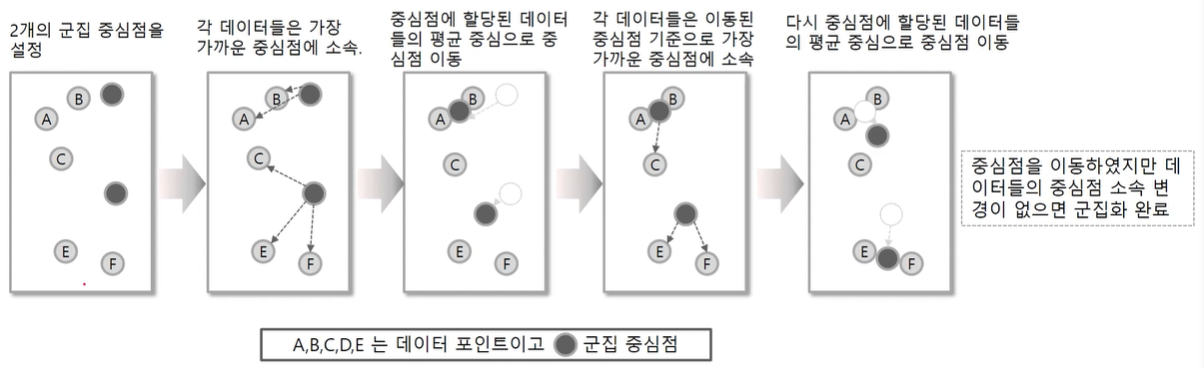

***K-평균의 장점***

- 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.

- 알고리즘이 쉽고 간결하다.




***K-평균의 단점***

- 거리 기반 알고리즘으로, 속성 개수가 매우 많을 경우 군집화 정확도가 떨어진다.(이를 위해 PCA 차원 축소를 적용하기도 함)

- 반복 수행시, 횟수가 많을 경우 수행 시간이 느려진다.

- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어렵다.

#### 사이킷런 KMeans 클래스

- KMeans는 다음과 같은 초기화 파라미터를 가지고 있다.

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')

**중요 파라미터**

1. n_clusters: 군집화할 개수, 군집 중심점의 개수

2. init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 'k-means++' 방식으로 최초 설정한다.

3. max_iter: 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

KMeans 객체는 군집화 수행이 완료되면 주요 속성을 반환한다.


**주요 속성**

1. labels_: 각 데이터 포인트가 속한 군집 중심점 레이블

2. cluster_centers_: 각 군집 중심점 좌표, 이를 이용하면 군집 중심점 좌표를 시각화할 수 있다.

#### K-평균을 이용한 iris 데이터셋 군집화

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


3개 그룹으로 군집화해보자

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


각 레코드가 1, 2, 3번째 군집에 속함을 의미한다.

In [6]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


분류 타겟이 0인 데이터는 1번 군집으로 모두 잘 grouping됐다.

그러나, target 1인 데이터는 2개만 2번으로 가고 나머지는 모두 0번 군집으로 grouping됐다.

또, target 2인 데이터는 0번에 14개, 2번에 36개로 분산되어 grouping됐다.

In [8]:
#시각화
#PCA를 이용해 2차원으로 축소한 뒤에 x좌표, y좌표로 개별 데이터를 표현하도록 하자
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


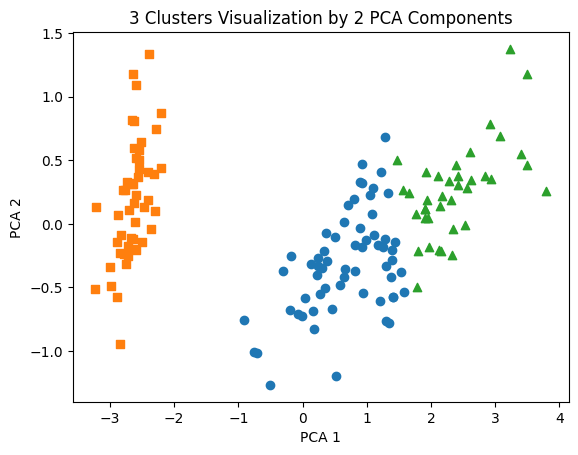

In [9]:
#군집값 0, 1, 2에 각각 o, s, ^로 마커 표시
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

plt.scatter(x=iris_df.loc[marker0_ind, 'pca_x'], y=iris_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[marker1_ind, 'pca_x'], y=iris_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_ind, 'pca_x'], y=iris_df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

cluster 0과 2는 상당 수준 분리되어있지만 1만큼 명확하게 분리되어있진 않다.

#### 군집화 알고리즘 테스트를 위한 데이터 생성

- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위해 간단한 데이터 생성기를 제공한다.

- make_blobs() 또는 make_classification()

- 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터셋을 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.

- 둘 간의 큰 차이는 없지만, make_blobs는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어있고, make_classification은 노이즈를 포함한 데이터를 만드는 데 유용하다.

- 이 밖에 make_circle(), make_moon()은 중심 기반의 군집화로 해결하기 어려운 데이터셋을 만드는데 사용한다.

**make_blobs()의 파라미터**

- 함수를 호출하면 피처 데이터셋과 타겟 데이터셋이 튜플 형태로 반환된다.

1. n_samples: 생성할 총 데이터의 개수, dafault=100

2. n_features: 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정하여 첫 번째는 x좌표, 두 번째는 y좌표상에 표현한다.

3. centers: 3같은 int형으로 설정하면 군집의 개수, ndarray형태로 설정하면 개별 군집 중심점의 좌표를 의미한다.

4. cluster_std: 생성될 군집 데이터의 표준 편차

  - 0.8같은 float형으로 지정하면 군집 내 데이터가 0.8을 표준편차로 가지는 데이터로 만들어짐

  - [0.8, 1.2, 0.6]과 같은 형태로 지정되면 3개의 군집에서 1, 2, 3번째 군집에서 각 군집 내 데이터가 0.8, 1.2, 0.6을 표준편차로 가지는 데이터로 만들어짐

  - 군집별로 서로 다른 표준편차를 가진 데이터셋을 만들 때 사용한다.



In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 데이터셋 X는 200개의 레코드와 2개의 피처를 가진다.

타겟 데이터셋 y의 3개의 cluster값은 [0, 1, 2]이며 각각 67, 67, 66개로 균일하게 구성되어있다.

In [12]:
#피처 이름을 ftr1, ftr2로 하고 데이터프레임 만들기
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


make_blobs으로 만든 피처 데이터셋이 어떤 군집화 분포를 갖고 만들어졌는지 확인해보자

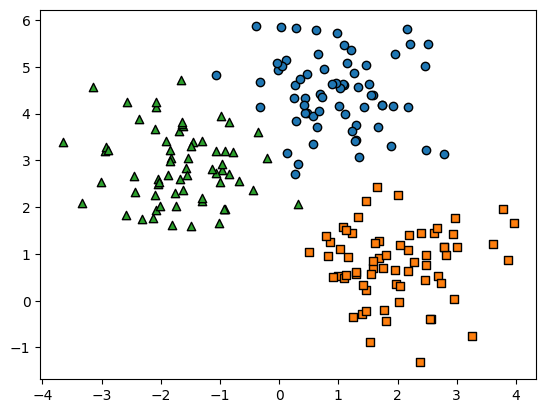

In [13]:
target_list = np.unique(y)

#각 타겟별로 산점도 마커를 다르게 하기
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
  target_cluster = cluster_df[cluster_df['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
              marker=markers[target])

plt.show()

이렇게 만들어진 데이터셋에 KMeans 군집화를 수행하고 군집별로 시각화해보자

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


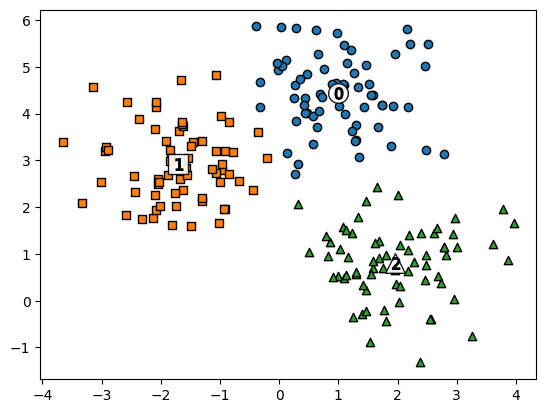

In [18]:
#KMeans 객체에 fit_predict(X)를 수행해 피처 데이터셋을 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

#개별 군집의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

#군집된 label 유형별로 반복하면서 marker별로 scatter plot 그리기
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for label in unique_labels:
  label_cluster = cluster_df[cluster_df['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
              marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
              edgecolor='k', marker='$%d$' % label)

plt.show()

In [19]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 대부분 잘 mapping되었다.

- make_blobs()는 cluster_std 파라미터로 데이터의 분포도를 조절한다.

- cluster_std가 작을수록 군집 중심에 데이터가 모여있으며, 클수록 퍼진다.